<a href="https://colab.research.google.com/github/jcuesta123/03MIAR---Algoritmos-de-Optimizacion/blob/main/5retos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1º CRIBA DE ERATOSTENES

In [ ]:
def criba_eratostenes(n):
    # Creamos una lista de booleanos para marcar los números primos
    # Inicialmente asumimos que todos los números son primos
    primes = [True] * (n + 1)
    primes[0] = primes[1] = False  # 0 y 1 no son primos

    p = 2  # Comenzamos con el primer número primo

    while p * p <= n:
        # Si primes[p] es verdadero, entonces es primo
        if primes[p]:
            # Marcamos todos los múltiplos de p como no primos
            for i in range(p * p, n + 1, p):
                primes[i] = False
        p += 1

    # Recorremos la lista y obtenemos los números primos
    prime_numbers = [i for i in range(n + 1) if primes[i]]

    return prime_numbers

print(criba_eratostenes(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


# 2º 8 REINAS

In [ ]:
def disponible(tablero, fila, columna, dimension):
    for i in range(fila):
        if tablero[i] == columna:
            return False
    i = fila - 1
    j = columna - 1
    while i >= 0 and j >= 0:
        if tablero[i] == j:
            return False
        i -= 1
        j -= 1
    i = fila - 1
    j = columna + 1
    while i >= 0 and j < dimension:
        if tablero[i] == j:
            return False
        i -= 1
        j += 1
    return True

def solucion(tablero, dimension, contador):

    print()
    print('Sol. #', contador)
    for fila in range(dimension):
        for columna in range(dimension):
            if tablero[fila] == columna:
                print('R', end=' ')
            else:
                print('.', end=' ')
        print()

def problema_reinas(tablero, fila, dimension, contador):
    if fila == dimension:
        contador[0] += 1
        solucion(tablero, dimension, contador)
        return

    for columna in range(dimension):
        if disponible(tablero, fila, columna, dimension):
            tablero[fila] = columna
            problema_reinas(tablero, fila + 1, dimension, contador)


dimension = 8 #numero de reinas, solo tocar este valor

tablero = [-1] * dimension
contador = [0]
problema_reinas(tablero, 0, dimension, contador)
print()
print('Hay en total', contador, 'soluciones.')


Sol. # [1]
R . . . . . . . 
. . . . R . . . 
. . . . . . . R 
. . . . . R . . 
. . R . . . . . 
. . . . . . R . 
. R . . . . . . 
. . . R . . . . 

Sol. # [2]
R . . . . . . . 
. . . . . R . . 
. . . . . . . R 
. . R . . . . . 
. . . . . . R . 
. . . R . . . . 
. R . . . . . . 
. . . . R . . . 

Sol. # [3]
R . . . . . . . 
. . . . . . R . 
. . . R . . . . 
. . . . . R . . 
. . . . . . . R 
. R . . . . . . 
. . . . R . . . 
. . R . . . . . 

Sol. # [4]
R . . . . . . . 
. . . . . . R . 
. . . . R . . . 
. . . . . . . R 
. R . . . . . . 
. . . R . . . . 
. . . . . R . . 
. . R . . . . . 

Sol. # [5]
. R . . . . . . 
. . . R . . . . 
. . . . . R . . 
. . . . . . . R 
. . R . . . . . 
R . . . . . . . 
. . . . . . R . 
. . . . R . . . 

Sol. # [6]
. R . . . . . . 
. . . . R . . . 
. . . . . . R . 
R . . . . . . . 
. . R . . . . . 
. . . . . . . R 
. . . . . R . . 
. . . R . . . . 

Sol. # [7]
. R . . . . . . 
. . . . R . . . 
. . . . . . R . 
. . . R . . . . 
R . . . . . . . 
. . . . . . . R

# 3º TORRES DE HANOI

In [ ]:
def hanoi(n, origen, auxiliar, destino):

    if n == 1:
        print(f"Mover disco 1 desde {origen} a {destino}")
        return

    hanoi(n - 1, origen, destino, auxiliar)
    print(f"Mover disco {n} desde {origen} a {destino}")

    hanoi(n - 1, auxiliar, origen, destino)

num_discos = 4      #número de discos
hanoi(num_discos, 'Torre 1', 'Torre 2', 'Torre 3')

Mover disco 1 desde Torre 1 a Torre 2
Mover disco 2 desde Torre 1 a Torre 3
Mover disco 1 desde Torre 2 a Torre 3
Mover disco 3 desde Torre 1 a Torre 2
Mover disco 1 desde Torre 3 a Torre 1
Mover disco 2 desde Torre 3 a Torre 2
Mover disco 1 desde Torre 1 a Torre 2
Mover disco 4 desde Torre 1 a Torre 3
Mover disco 1 desde Torre 2 a Torre 3
Mover disco 2 desde Torre 2 a Torre 1
Mover disco 1 desde Torre 3 a Torre 1
Mover disco 3 desde Torre 2 a Torre 3
Mover disco 1 desde Torre 1 a Torre 2
Mover disco 2 desde Torre 1 a Torre 3
Mover disco 1 desde Torre 2 a Torre 3


# 4º DESCENSO DE GRADIENTE

In [ ]:
#Optimización de la función f(x)=sin(1/2∗x^2−1/4∗y^2+3)∗cos(2∗x+1−exp(y) mediante el algoritmo por descenso del gradiente.
import numpy as np

def f(x, y):
    f = np.sin(0.5 * x**2 - 0.25 * y**2 + 3) * np.cos(2 * x + 1 - np.exp(y))
    return f

def gradiente(x,y):
    delta_h = 0.00001     #se puede variar para ajustar el parametro
    df_dx = (f(x + delta_h, y) - f(x,y))/delta_h
    df_dy = (f(x, y + delta_h) - f(x,y))/delta_h
    return df_dx, df_dy     #en este caso se podría también derivar analíticamente en lugar de numéricamente

def gradient_descent(alpha, iterations, x_0, y_0):
    x, y = x_0, y_0
    for i in range(iterations):
        df_dx, df_dy = gradiente(x, y)
        x -= alpha * df_dx
        y -= alpha * df_dy
    return x, y

# Parámetros del algoritmo
x_0 = 0    #el punto de inicio es determinante para la solución final (ej [-10,-10])
y_0 = 0    #ojo con valores exponente
learning_rate = 0.01   #ajustar learning rate y num iter. para mejor precisión-rendimiento
num_iterations = 10000

# Ejecutar el descenso del gradiente
x_opt, y_opt = gradient_descent(learning_rate, num_iterations, x_0, y_0)

print("Mínimo de la función (x,y): [", x_opt, ",", y_opt, "]")
print("Valor del mínimo local (o global) de f(x):", f(x_opt, y_opt))

Mínimo de la función (x,y): [ 2.2017557908335434 , 1.6870423905901109 ]
Valor del mínimo local (o global) de f(x): -0.9999999979664981


# 5º REGRESION LINEAL (D.G.)

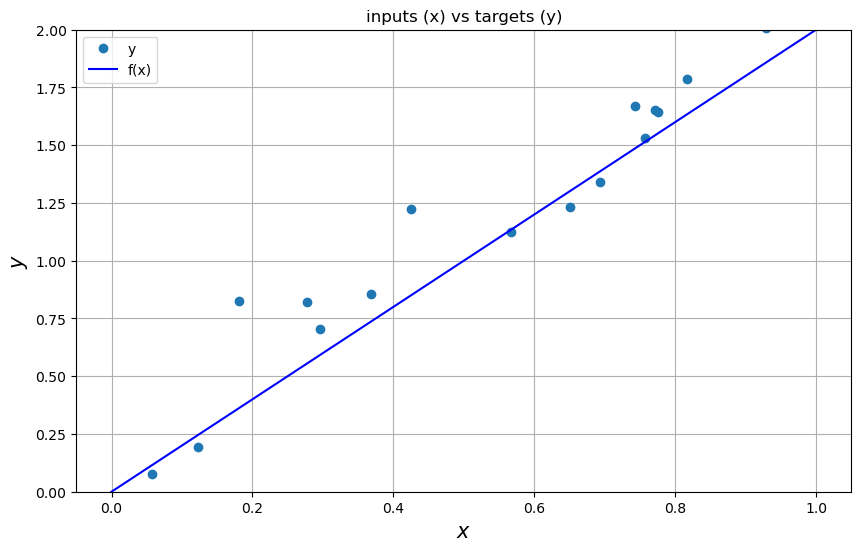

In [ ]:
#Implementar el algoritmo del descenso por gradiente para el problema de la regresión lineal simple.
#Primero se representa el enunciado, y se generan los puntos aletarorios con ruido en torno a la recta y=2x

import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(0,1,20)
def f(x): return x*2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()

In [ ]:
#la recta de la regresión tendra la forma y = w0 + w1 * x

def funcion_coste(x,y,w0,w1):
    sumatorio = 0
    for i in range(len(x)):
        sumatorio += ((w1 * x[i] + w0) - y[i])**2
    return sumatorio

def parcial_w0(x,y,w0,w1):
    sumatorio = 0
    for i in range(len(x)):
        sumatorio += 2 * (w1 * x[i] + w0 - y[i])   #derivado analiticamente
    return sumatorio

def parcial_w1(x,y,w0,w1):
    sumatorio = 0
    for i in range(len(x)):
        sumatorio += 2 * (w1 * x[i] + w0 - y[i]) * x[i]
    return sumatorio

def descenso_gradiente(w0, w1, step_size, num_iter):
    for _ in range(num_iter):
        w0 -= step_size * parcial_w0(x,y,w0,w1)
        w1 -= step_size * parcial_w1(x,y,w0,w1)
    return w0, w1

#asignacion de parametros
w0 = 0
w1 = 0
step_size = 0.01
num_iter = 10000

#ejecutar descenso gradiente
w0_opt, w1_opt = descenso_gradiente(w0, w1, step_size, num_iter)

print('La recta de la regresión lineal es: y = ', w0_opt, '+', w1_opt, 'x' )
print('La función de coste ha pasado de valer incialmente ', funcion_coste(x,y,w0,w1), 'a finalmente', funcion_coste(x,y,w0_opt, w1_opt))


La recta de la regresión lineal es: y =  -0.004978101688892626 + 2.2477295353774056 x
La función de coste ha pasado de valer incialmente  38.33283004984428 a finalmente 0.6648289147408227


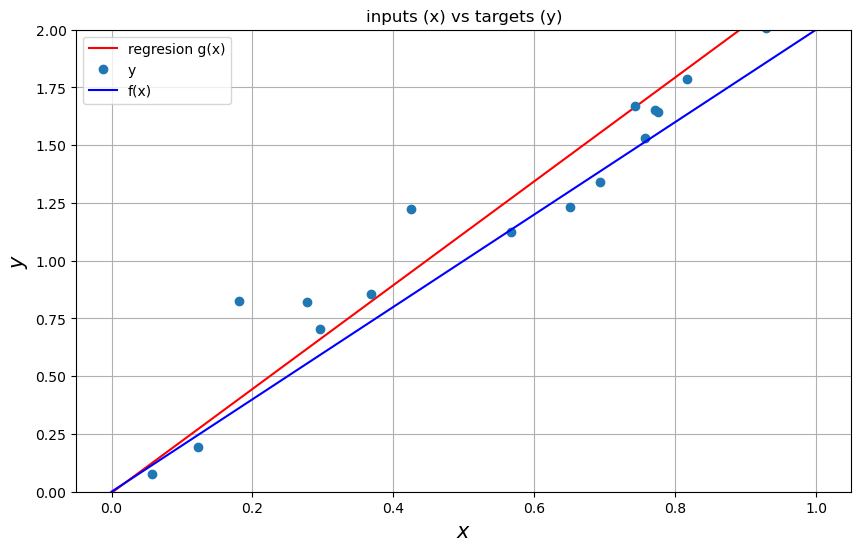

In [ ]:
#representacion grafica del resultado
def g(x): return w0_opt + w1_opt * x
plt.plot([0, 1], [g(0), g(1)], 'r', label='regresion g(x)')

#igual que antes
plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()